## رگرسیون چند گانه

<div dir=rtl style="text-align: left">

هدف: پیش‌بینی تعداد دنبال‌کننده‌ها (Follows) بر اساس ویژگی‌های مختلف مانند بازدید از پروفایل (Profile Visits)، ایمپرشن (Impressions)، و اشتراک‌گذاری‌ها (Shares).

</div>

In [718]:
# =====================
# import libraries
# =====================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import Ridge


دیتاست از سایت کگل دانلود شده: و در دایرکتوری فعلی قرار گرفته
<a href="https://www.kaggle.com/datasets/amirmotefaker/instagram-data">لینک</a>

In [719]:
# =====================
# load dataset
# =====================

df = pd.read_csv("Instagram data.csv", encoding='latin1')


In [720]:
# =====================
# print info
# =====================

print('first rows')
print(df.head())

print('shape')
print(df.shape)

print('columns')
df.dtypes

first rows
   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a mac

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

###  بررسی همبستگی بین ویژگی‌ها و متغیر هدف

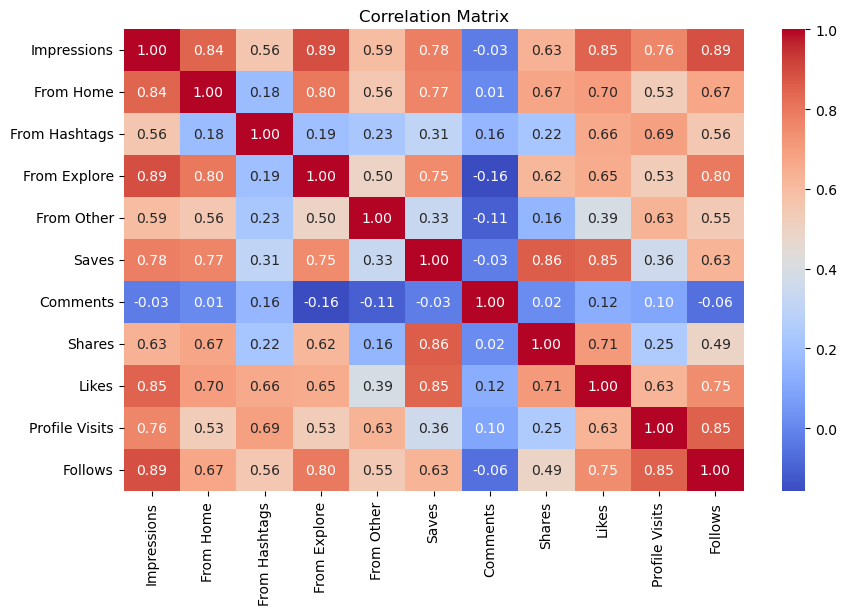

In [721]:
# =====================
# visualization
# =====================

#correlation matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

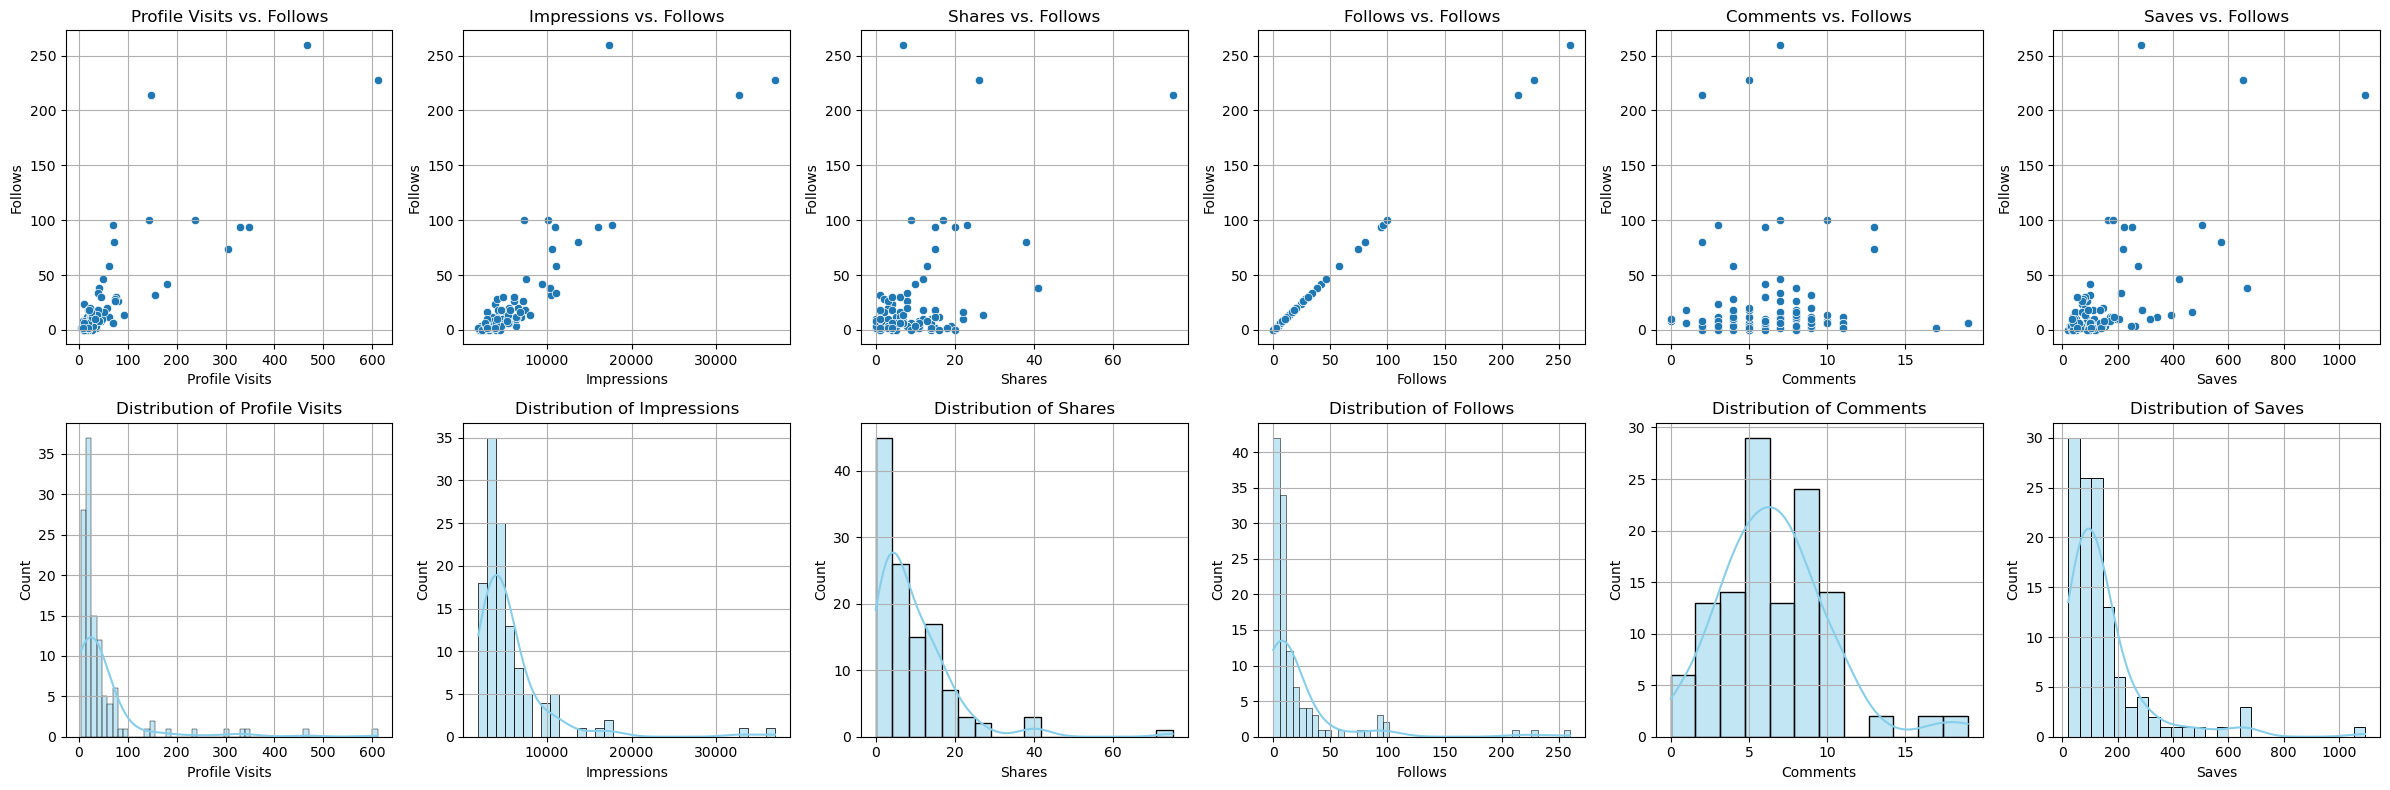

In [722]:
features = ['Profile Visits', 'Impressions', 'Shares', 'Follows', 'Comments', 'Saves']
fig, axs = plt.subplots(2, len(features), figsize=(4 * len(features), 8), squeeze=False)

# Row 1: Scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Follows', ax=axs[0, i])
    axs[0, i].set_title(f'{feature} vs. Follows')
    axs[0, i].set_xlabel(feature)
    axs[0, i].set_ylabel('Follows')
    axs[0, i].grid(True)

# Row 2: Distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axs[1, i], color='skyblue')
    axs[1, i].set_title(f'Distribution of {feature}')
    axs[1, i].set_xlabel(feature)
    axs[1, i].set_ylabel('Count')
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()


In [723]:
# =====================
# preprocessing
# =====================

#select related features
df = df[features].copy()

# Check for NaN values
print("Number of NaN values:")
print(df.isna().sum())

Number of NaN values:
Profile Visits    0
Impressions       0
Shares            0
Follows           0
Comments          0
Saves             0
dtype: int64


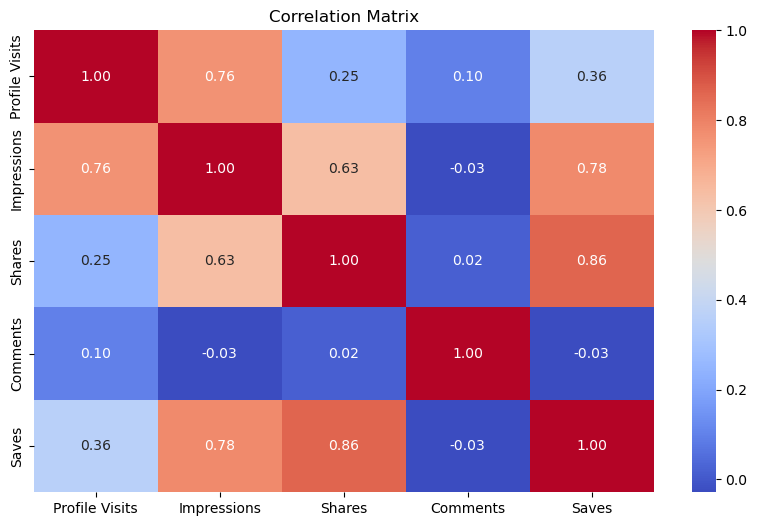

In [724]:
#correlation matrix
correlation_matrix = df.drop(columns=['Follows']).corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

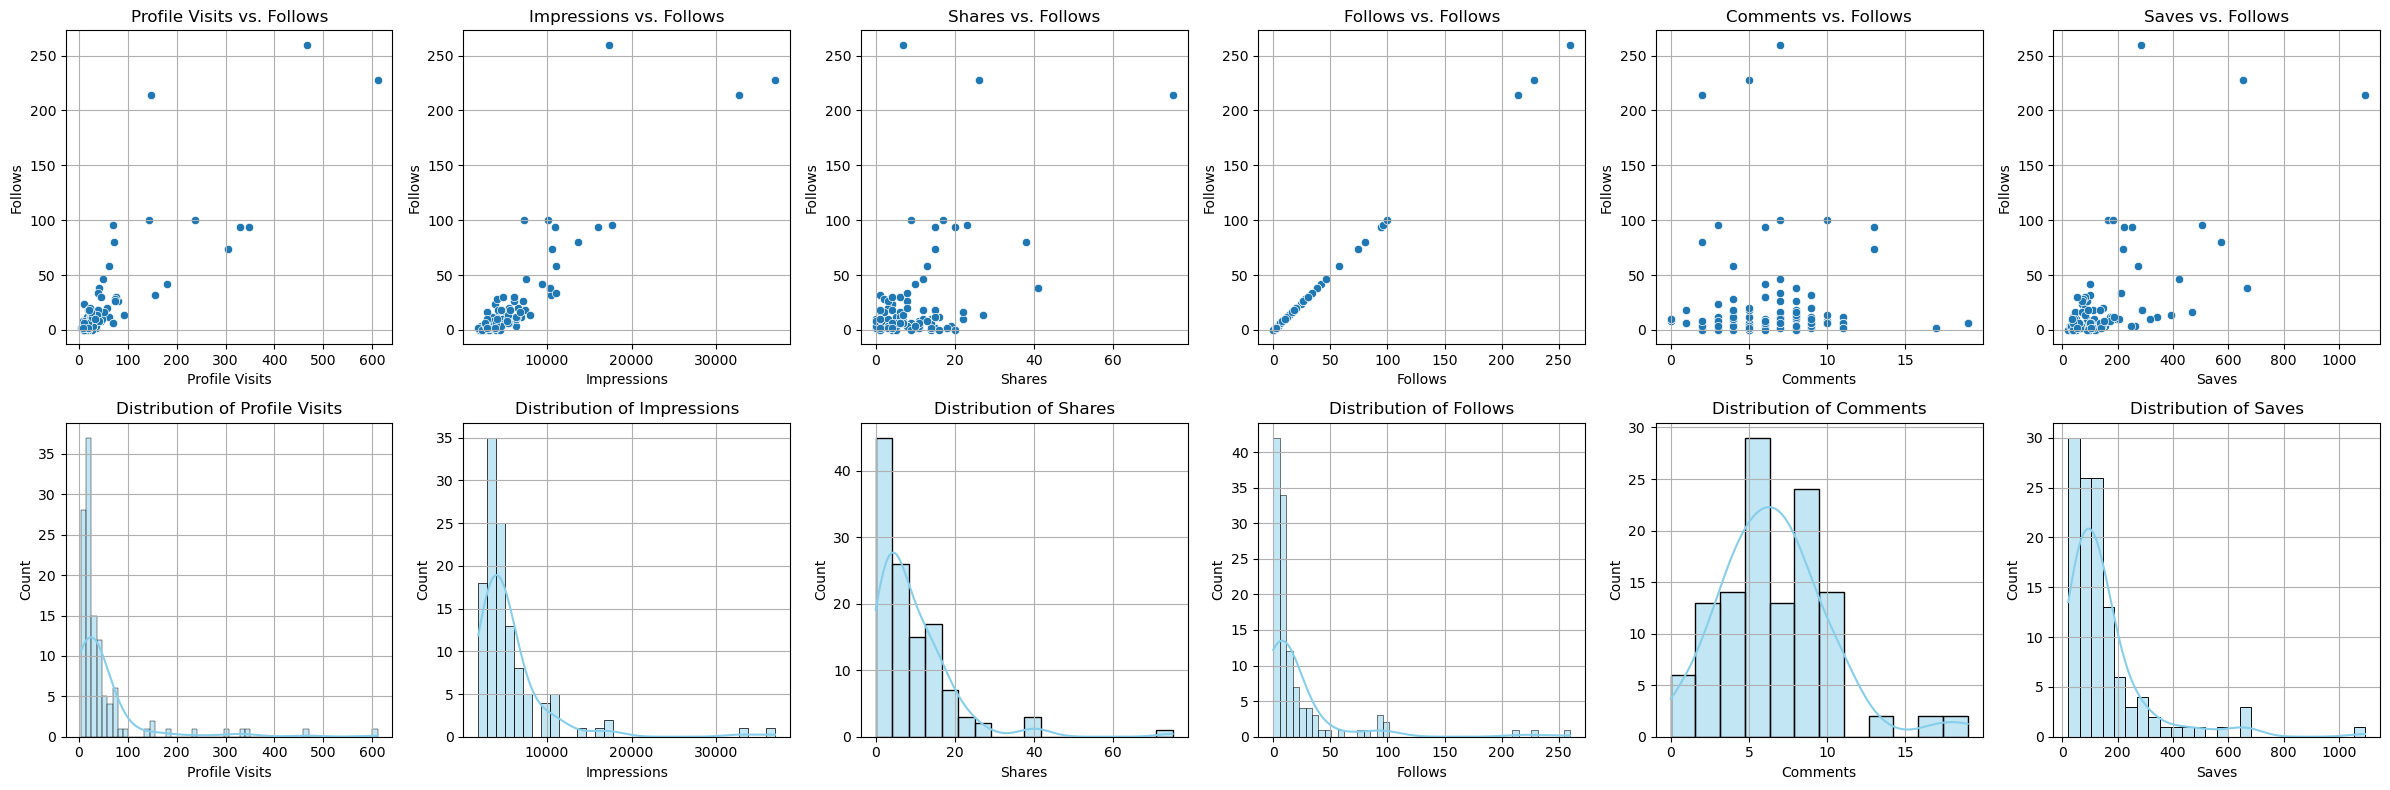

In [725]:
fig, axs = plt.subplots(2, len(features), figsize=(4 * len(features), 8), squeeze=False)

# Row 1: Scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Follows', ax=axs[0, i])
    axs[0, i].set_title(f'{feature} vs. Follows')
    axs[0, i].set_xlabel(feature)
    axs[0, i].set_ylabel('Follows')
    axs[0, i].grid(True)

# Row 2: Distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axs[1, i], color='skyblue')
    axs[1, i].set_title(f'Distribution of {feature}')
    axs[1, i].set_xlabel(feature)
    axs[1, i].set_ylabel('Count')
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

In [726]:
scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[features] = scaler.fit_transform(df_scaled[features])

In [727]:
# =====================
# Train-Test Split
# =====================

# Define features (X) and target (y)
X = df_scaled.drop(columns=['Follows'])
y = df_scaled['Follows']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 95 samples
Test set size: 24 samples


In [728]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 10.0


In [736]:
# =====================
# Train Ridg Regression Model
# =====================

# Initialize and train model
model = Ridge(alpha=ridge_cv.alpha_)
model.fit(X_train, y_train)

# Print coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}: {coef:.3f}")

# Print intercept just once
print(f"Intercept: {model.intercept_:.3f}")



Coefficient for Profile Visits: 0.571
Coefficient for Impressions: 0.261
Coefficient for Shares: -0.013
Coefficient for Comments: -0.071
Coefficient for Saves: 0.123
Intercept: -0.007


Mean Squared Error (MSE): 0.199
Root Mean Squared Error (RMSE): 0.446
Test R²: 0.837
Train R²: 0.872


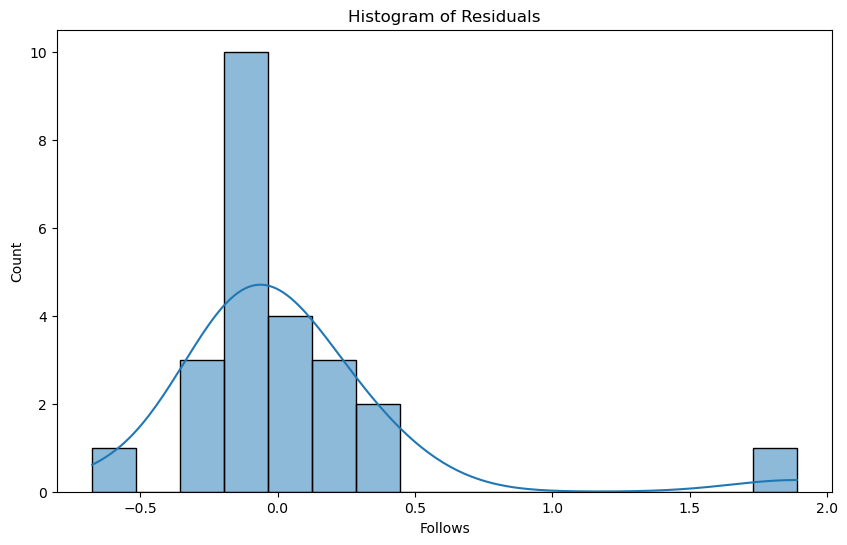

In [737]:
# =====================
# Model Evaluation
# =====================

# Make predictions
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Test R²: {r2:.3f}")

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Train R²: {r2_train:.3f}")

# نمودار باقی‌مانده‌ها
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [738]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv)
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.83720953 0.82864391 0.82421313 0.76452658 0.82700076]
Mean R²: 0.8163187828188349


### 📌 نتیجه‌گیری

<div dir=rtl style="text-align: left">
 برای اینکه نتیجه مدل دقیق تر ارزیابی شودعلاوه بر r2 score از kfold  هم استفاده کردیم تا نتیجه روی چندین مجموعه داده آزمایش شود
 طبق نتیجه بدست آمده دقت مدل در حد 80 درصد است

 <div>